In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read Dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [38]:
#inspect data
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [47]:
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2].values

In [48]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [49]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

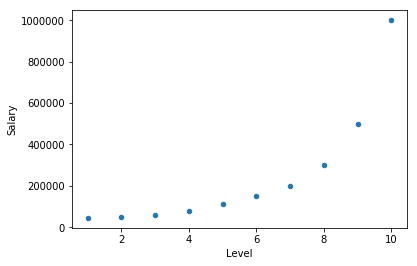

In [50]:
dataset.plot(x ='Level',y='Salary',kind='scatter')

In [51]:
#Fitting Linear regression to dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
#Fitting Polynomial Regression to dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [84]:
pd.DataFrame(X_poly)

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


In [85]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

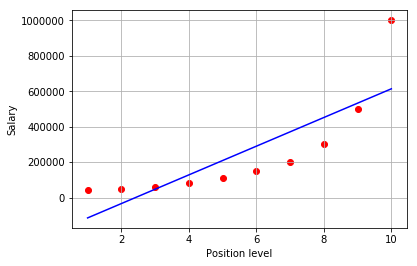

In [86]:
#Visualise linear Regression results
plt.scatter(X, Y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.grid(True)

In [100]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))

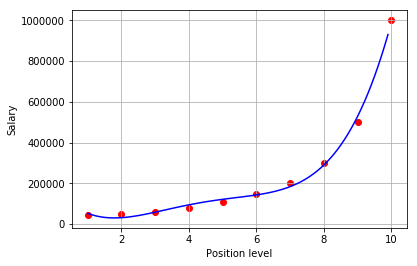

In [106]:
#Visualise the Polynomial results
plt.scatter(X, Y,color='red')
plt.plot(X_grid,lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.grid(True)